In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from warnings import filterwarnings

In [2]:
filterwarnings('ignore')

In [3]:
df_income_cost = pd.read_excel('Sumrzd_data.xlsx', engine="openpyxl", sheet_name=None, index_col=0)

In [4]:
df_income_cost

{'R98.xlsx':                    tot   tot_cost
 Address                          
 20001383911   43000000   51716200
 20001383916  236360008  107005300
 20001383920  216000000   30021440
 20001383923  372000000   31447552
 20001384008   10000000   38207552
 ...                ...        ...
 23006709717  200000000   22908500
 23006709720  420000000  293785000
 23006709723  333000000   81397000
 23006709807  406200000   42202400
 23006709818  625520000   41527500
 
 [16457 rows x 2 columns],
 'R99.xlsx':                    tot   tot_cost
 Address                          
 20001383916  312140008  145932000
 20001383917  173760000   91528000
 20001383919  282400000   15020000
 20001383923  295560000   56097552
 20001383926   25760000   38532552
 ...                ...        ...
 23006709817   36640000   71625000
 23006709820  500560000   96163400
 23006709823  492360000   54644000
 23006709826  528920000   48650000
 23006709829   24600000   46260000
 
 [17832 rows x 2 columns],
 'R1400.

In [5]:
file_list_income = ['R98.xlsx' ,'R99.xlsx' ,'R1400.xlsx', 'R1401.xlsx' , 'U98.xlsx' , 'U99.xlsx' ,'U1400.xlsx', 'U1401.xlsx'] 

In [6]:
kmeans = {}
labels = {}
centroids = {}
for file_index, file_name in enumerate(file_list_income):
    kmeans[file_name] = KMeans(n_clusters=10, random_state=0, n_init=10).fit(df_income_cost[file_name])
    labels[file_name] = kmeans[file_name].labels_
    centroids[file_name] = kmeans[file_name].cluster_centers_

In [7]:
filtered_data = df_income_cost['R99.xlsx' ][(df_income_cost['R99.xlsx' ].iloc[:, 0] < 3e9) & (df_income_cost['R99.xlsx' ].iloc[:, 1] < 4e9)]
filtered_labels = labels['R99.xlsx' ][(df_income_cost['R99.xlsx' ].iloc[:, 0] < 3e9) & (df_income_cost['R99.xlsx' ].iloc[:, 1] < 4e9)]
filtered_labels_plus_1 = filtered_labels + 1
filtered_centroids = centroids['R99.xlsx' ][(centroids['R99.xlsx' ][:, 0] < 4e9)]


In [8]:
def edit_data(file_name):
    filtered_data = df_income_cost[file_name][(df_income_cost[file_name].iloc[:, 0] < df_income_cost[file_name].iloc[:, 0].max()//2) & (df_income_cost[file_name].iloc[:, 1] < df_income_cost[file_name].iloc[:, 0].max()//2)]
    filtered_labels = labels[file_name][(df_income_cost[file_name].iloc[:, 0] < df_income_cost[file_name].iloc[:, 0].max()//2) & (df_income_cost[file_name].iloc[:, 1] < df_income_cost[file_name].iloc[:, 0].max()//2)]
    filtered_labels_plus_1 = filtered_labels + 1
    filtered_centroids = centroids[file_name][(centroids[file_name][:, 0] < centroids[file_name][:, 0].max()//2)]
    return filtered_data, filtered_labels, filtered_centroids

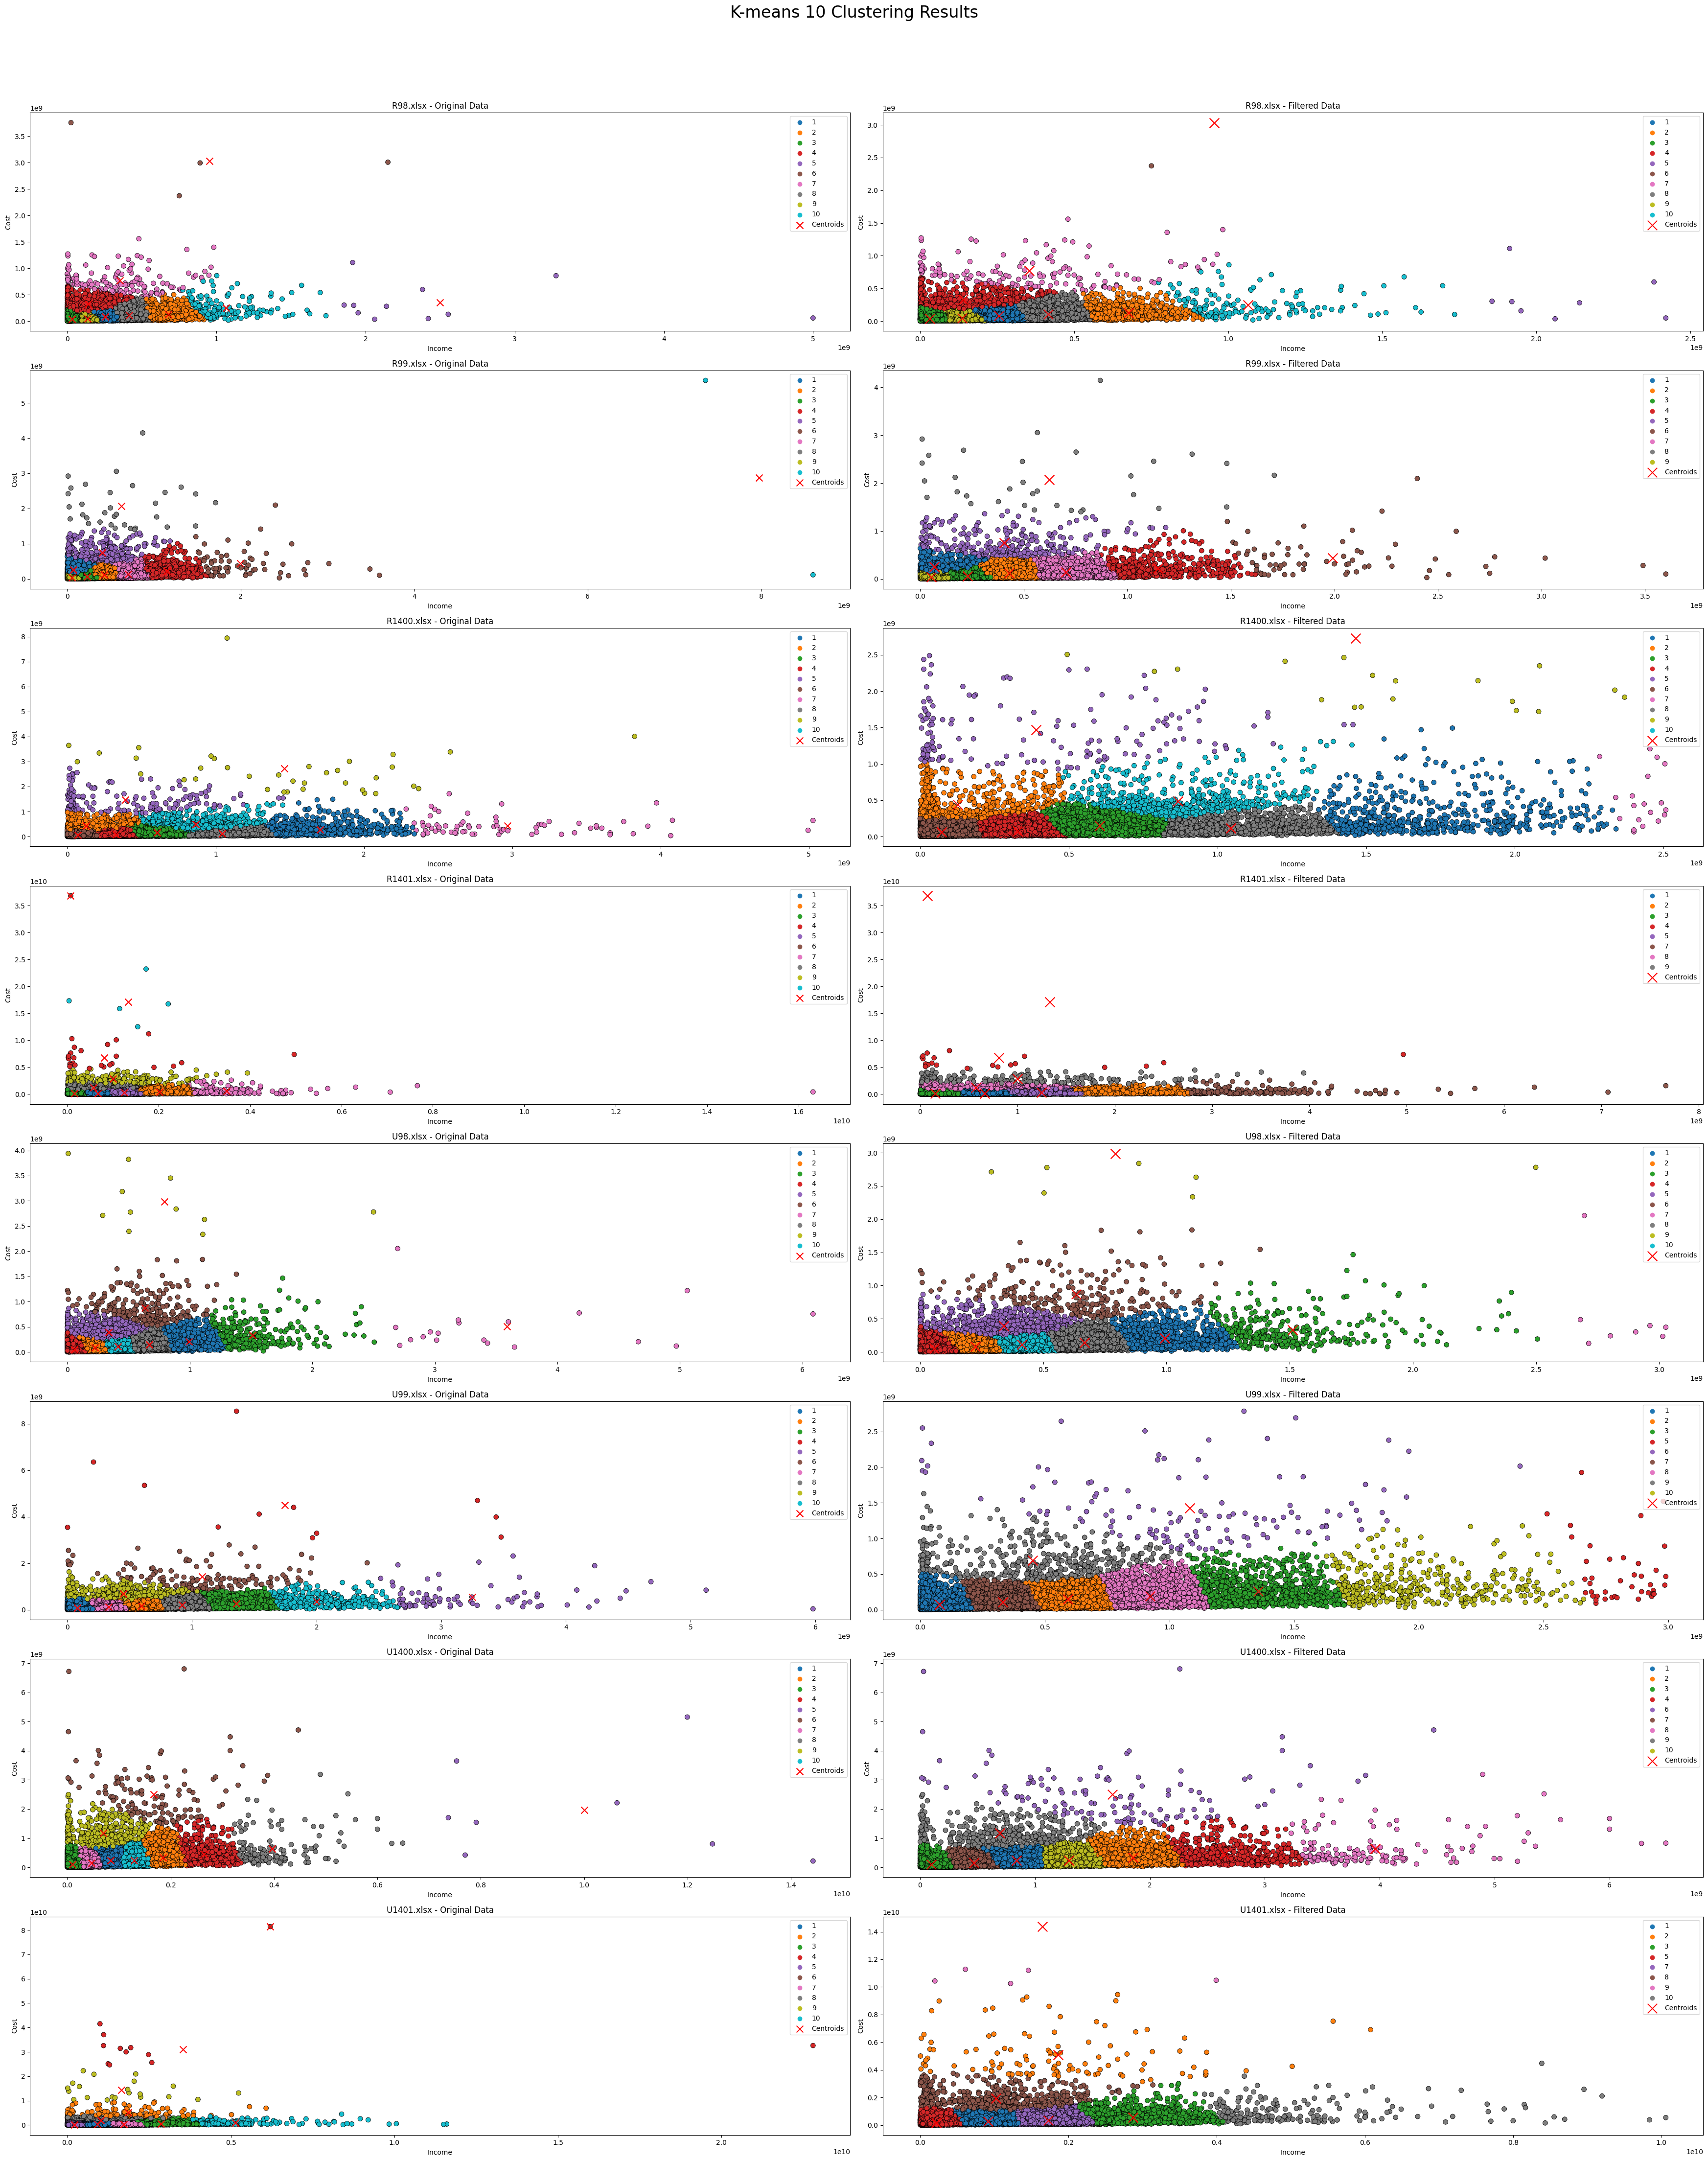

In [9]:
fig, axes = plt.subplots(8, 2, figsize=(35, 45))  
axes = axes.flatten()
for file_index, file_name in enumerate(file_list_income):

    num_clusters = len(set(labels[file_name]))  
    palette = sns.color_palette("tab10", num_clusters)
    
    labels_plus_1 = labels[file_name] + 1
    sns.scatterplot(x=df_income_cost[file_name].iloc[:, 0], y=df_income_cost[file_name].iloc[:, 1], hue=labels_plus_1, palette=palette, s=50, edgecolor='k', legend=True, ax=axes[file_index * 2])
    
 
    axes[file_index * 2].scatter(centroids[file_name][:, 0], centroids[file_name][:, 1], c='red', s=100, marker='x', label='Centroids')
    
    axes[file_index * 2].set_title(f"{file_name} - Original Data")
    axes[file_index * 2].set_xlabel('Income')
    axes[file_index * 2].set_ylabel('Cost')
    # axes[file_index * 2].legend(loc='upper right', bbox_to_anchor=(0.05, 0.95))



    axes[file_index * 2].legend()


    filtered_data, filtered_labels, filtered_centroids = edit_data(file_name)
    
    sns.scatterplot(x=filtered_data.iloc[:, 0], y=filtered_data.iloc[:, 1], hue=filtered_labels + 1, palette=palette, s=50, edgecolor='k', legend=True, ax=axes[file_index * 2 + 1])
    

    axes[file_index * 2 + 1].scatter(filtered_centroids[:, 0], filtered_centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
    axes[file_index * 2 + 1].set_title(f"{file_name} - Filtered Data")
    axes[file_index * 2 + 1].set_xlabel('Income')
    axes[file_index * 2 + 1].set_ylabel('Cost')
    # axes[file_index * 2 + 1].legend(loc='upper right', bbox_to_anchor=(0.05, 0.95))



    axes[file_index * 2 + 1].legend()
plt.suptitle('K-means 10 Clustering Results', fontsize=24)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('high_resolution_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()
